Feature Engineering + Model Training

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("processed_f1_data.csv")
print(df.head(10))

   raceId  year  round        date  driverId           driver_name  \
0     833  1950      1  1950-05-13       660          Johnny Claes   
1     833  1950      1  1950-05-13       790        Leslie Johnson   
2     833  1950      1  1950-05-13       579           Juan Fangio   
3     833  1950      1  1950-05-13       661          Peter Walker   
4     833  1950      1  1950-05-13       789         Eugène Martin   
5     833  1950      1  1950-05-13       589          Louis Chiron   
6     833  1950      1  1950-05-13       640  Toulo de Graffenried   
7     833  1950      1  1950-05-13       785        Geoff Crossley   
8     833  1950      1  1950-05-13       747          David Murray   
9     833  1950      1  1950-05-13       778    Brian Shawe Taylor   

   constructorId constructor_name  positionOrder  grid  qualifying_position  \
0            154             lago             11    21                 20.0   
1            151              era             21    12                 

In [3]:
df = pd.get_dummies(df, columns=["constructor_name", "circuit_name", "country"], drop_first=True)

In [4]:
feature_cols = [
    "grid",
    "qualifying_position",
    "past_wins_at_circuit"
] + [col for col in df.columns if col.startswith("constructor_name_") or 
                               col.startswith("circuit_name_") or 
                               col.startswith("country_")]

X = df[feature_cols]
y = df["is_winner"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

c:\Users\chira\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:59:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [11]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions with Random Forest
rf_preds = rf.predict(X_test)

# Train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_preds = xgb.predict(X_test)


c:\Users\chira\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


 Random Forest Results:
Accuracy: 0.9473094170403588
Confusion Matrix:
 [[5028   98]
 [ 184   42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5126
           1       0.30      0.19      0.23       226

    accuracy                           0.95      5352
   macro avg       0.63      0.58      0.60      5352
weighted avg       0.94      0.95      0.94      5352


 XGBoost Results:
Accuracy: 0.9566517189835575
Confusion Matrix:
 [[5076   50]
 [ 182   44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5126
           1       0.47      0.19      0.28       226

    accuracy                           0.96      5352
   macro avg       0.72      0.59      0.63      5352
weighted avg       0.94      0.96      0.95      5352



Top 3 accuracy score 

In [13]:
def top_k_accuracy(model, X_test, y_test, k=3):
    probs = model.predict_proba(X_test)
    top_k_preds = np.argsort(probs, axis=1)[:, -k:]
    y_true_indices = y_test.reset_index(drop=True).values
    correct = 0
    for i, top_preds in enumerate(top_k_preds):
        if 1 in top_preds:  # 1 = winner class
            correct += 1
    print(f"Top-{k} Accuracy: {correct / len(y_test):.2f}")

top_k_accuracy(xgb, X_test, y_test, k=3)


Top-3 Accuracy: 1.00


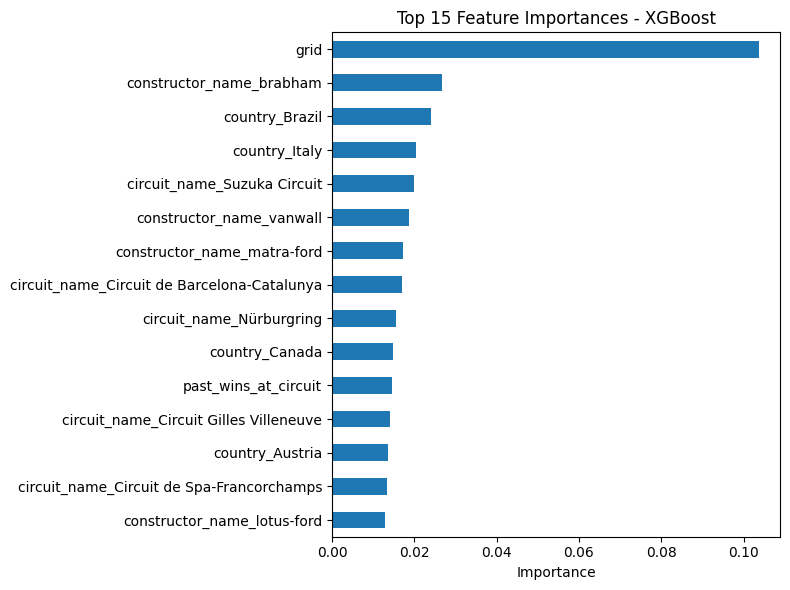

In [15]:
import matplotlib.pyplot as plt

xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importance.sort_values(ascending=True).tail(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [21]:
print(df.columns.tolist())


['raceId', 'year', 'round', 'date', 'driverId', 'driver_name', 'constructorId', 'positionOrder', 'grid', 'qualifying_position', 'is_winner', 'circuitId', 'past_wins_at_circuit', 'constructor_name_afm', 'constructor_name_ags', 'constructor_name_alfa', 'constructor_name_alphatauri', 'constructor_name_alpine', 'constructor_name_alta', 'constructor_name_amon', 'constructor_name_apollon', 'constructor_name_arrows', 'constructor_name_arzani-volpini', 'constructor_name_aston_martin', 'constructor_name_ats', 'constructor_name_bar', 'constructor_name_behra-porsche', 'constructor_name_bellasi', 'constructor_name_benetton', 'constructor_name_bmw', 'constructor_name_bmw_sauber', 'constructor_name_boro', 'constructor_name_brabham', 'constructor_name_brabham-alfa_romeo', 'constructor_name_brabham-brm', 'constructor_name_brabham-climax', 'constructor_name_brabham-ford', 'constructor_name_brabham-repco', 'constructor_name_brawn', 'constructor_name_brm', 'constructor_name_brm-ford', 'constructor_name_b

C:\Users\chira\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


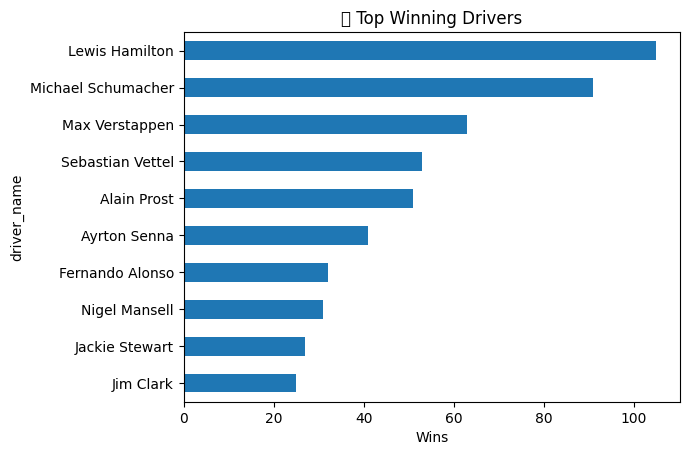

In [16]:
# Only include winners
winners_df = df[df['is_winner'] == 1]

top_drivers = winners_df['driver_name'].value_counts().head(10)
top_drivers.plot(kind='barh', title='🏁 Top Winning Drivers')
plt.xlabel("Wins")
plt.gca().invert_yaxis()
plt.show()


C:\Users\chira\AppData\Local\Temp\ipykernel_21104\2883251824.py:17: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chira\AppData\Local\Temp\ipykernel_21104\2883251824.py:17: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\chira\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\chira\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


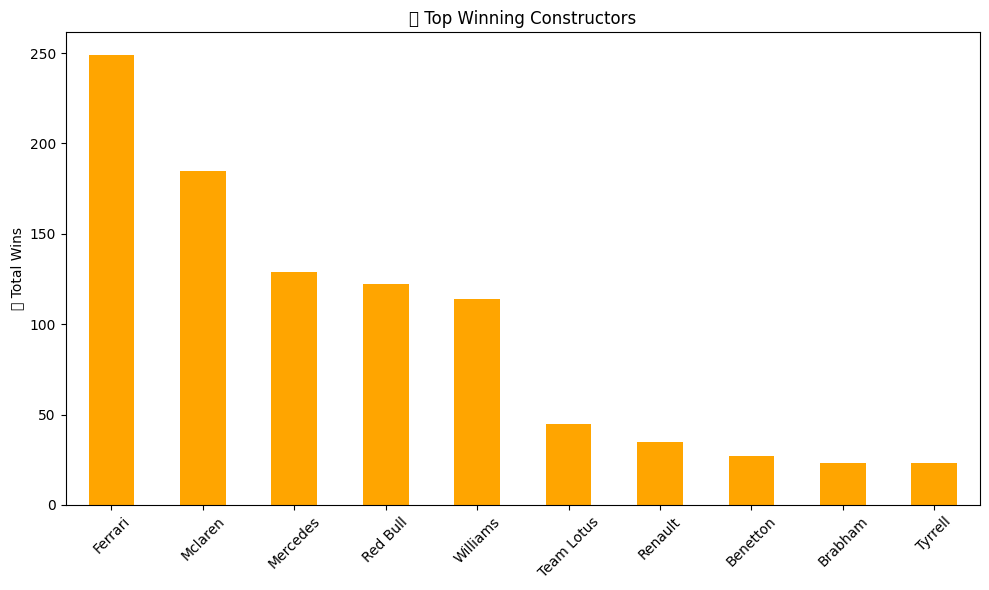

In [22]:
# 1. Filter only winning rows
winners_df = df[df['is_winner'] == 1]

# 2. Extract only constructor dummy columns
constructor_cols = [col for col in winners_df.columns if col.startswith('constructor_name_')]

# 3. Sum across each column (each column represents 1 constructor's wins)
constructor_wins = winners_df[constructor_cols].sum().sort_values(ascending=False)

# 4. Clean up names (remove prefix)
constructor_wins.index = constructor_wins.index.str.replace('constructor_name_', '').str.replace('_', ' ').str.title()

# 5. Plot top 10
constructor_wins.head(10).plot(kind='bar', figsize=(10, 6), color='orange', title='🏎️ Top Winning Constructors')
plt.ylabel("🏁 Total Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


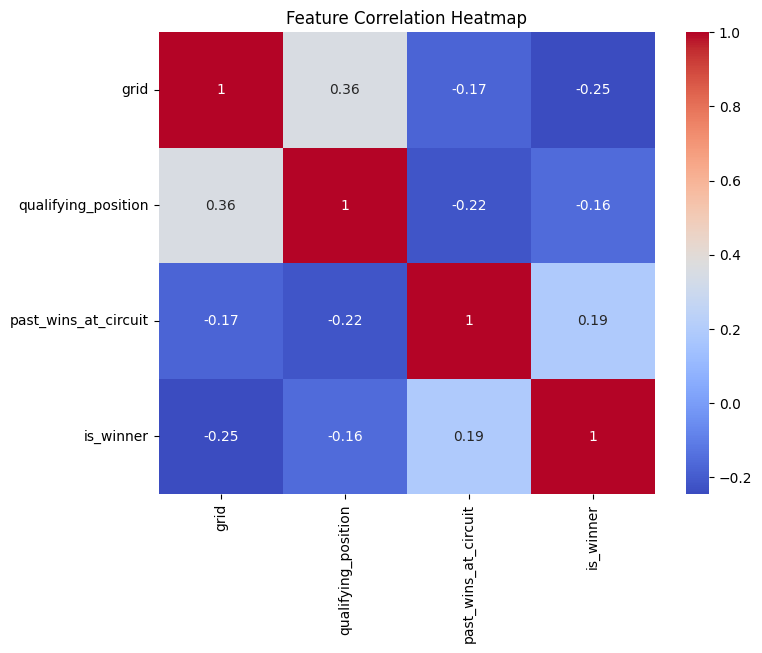

In [24]:
import seaborn as sns

numeric_df = df[['grid', 'qualifying_position', 'past_wins_at_circuit', 'is_winner']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
import joblib
joblib.dump(xgb, "f1_winner_model.pkl")
print("✅ Model saved as f1_winner_model.pkl")


✅ Model saved as f1_winner_model.pkl


In [26]:
# Save feature column names used in training
with open('feature_columns.txt', 'w') as f:
    for col in X.columns:
        f.write(col + '\n')
